In [1]:
import warnings
warnings.filterwarnings(action='ignore')
import os
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from sklearn.utils import resample
from scipy import stats
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Input, BatchNormalization, Conv1D,ReLU, LSTM, MaxPool1D, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [2]:
tf.random.set_seed(42)

In [3]:
df = pd.read_csv('Stroke-Rehab-Dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215745 entries, 0 to 1215744
Data columns (total 14 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   alx       1215745 non-null  float64
 1   aly       1215745 non-null  float64
 2   alz       1215745 non-null  float64
 3   glx       1215745 non-null  float64
 4   gly       1215745 non-null  float64
 5   glz       1215745 non-null  float64
 6   arx       1215745 non-null  float64
 7   ary       1215745 non-null  float64
 8   arz       1215745 non-null  float64
 9   grx       1215745 non-null  float64
 10  gry       1215745 non-null  float64
 11  grz       1215745 non-null  float64
 12  Activity  1215745 non-null  int64  
 13  subject   1215745 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 129.9+ MB


In [4]:
df.dtypes

alx         float64
aly         float64
alz         float64
glx         float64
gly         float64
glz         float64
arx         float64
ary         float64
arz         float64
grx         float64
gry         float64
grz         float64
Activity      int64
subject      object
dtype: object

In [5]:
df.head()

alx     aly      alz       glx      gly      glz     arx     ary  \
0  2.1849 -9.6967  0.63077  0.103900 -0.84053 -0.68762 -8.6499 -4.5781   
1  2.3876 -9.5080  0.68389  0.085343 -0.83865 -0.68369 -8.6275 -4.3198   
2  2.4086 -9.5674  0.68113  0.085343 -0.83865 -0.68369 -8.5055 -4.2772   
3  2.1814 -9.4301  0.55031  0.085343 -0.83865 -0.68369 -8.6279 -4.3163   
4  2.4173 -9.3889  0.71098  0.085343 -0.83865 -0.68369 -8.7008 -4.1459   

        arz      grx     gry       grz  Activity   subject  
0  0.187760 -0.44902 -1.0103  0.034483         0  subject1  
1  0.023595 -0.44902 -1.0103  0.034483         0  subject1  
2  0.275720 -0.44902 -1.0103  0.034483         0  subject1  
3  0.367520 -0.45686 -1.0082  0.025862         0  subject1  
4  0.407290 -0.45686 -1.0082  0.025862         0  subject1

In [6]:
df.sample(10)

alx     aly        alz      glx      gly       glz      arx  \
883337   1.97150 -9.2864  -0.913350  0.23562 -0.43715  0.039293 -4.52230   
439719   2.39870 -7.3696  -6.271600 -0.33952 -0.14447 -0.944990  4.63110   
782348   1.04620 -9.7324   1.013400  0.36549 -0.65854  0.528490 -6.37400   
1079939  5.34440 -7.7863  15.425000 -0.41002 -0.19512 -1.053000  0.97216   
509921  -0.86811 -7.6994  -0.633230  0.31911 -0.78236  0.339880  2.89780   
538884  -0.26109 -9.6636   0.962120 -0.72171 -0.71107  0.229860 -8.27900   
646925   1.43810 -9.7186   0.413870 -0.38404 -0.80863  0.669940 -9.39740   
448424   0.56600 -9.5934   0.067658 -0.71429 -0.78987 -0.326130 -0.99745   
51284    2.44040 -9.4563   0.905760 -0.33581 -0.75047  0.422400 -7.52350   
667744   2.98530 -9.4021   1.372200  0.03154 -0.84991 -0.591360 -1.90080   

            ary       arz       grx      gry       grz  Activity   subject  
883337  -8.1687  2.133200 -0.084314 -0.53388 -0.127160         0  subject8  
439719  -7.4023  6.765300 -0.321570 -1.11910  0.260780         0  subject4  
782348   1.4930  7.303800  0.003922  0.14168  1.122800         0  subject7  
1079939  4.2684 -0.161580 -0.860780 -0.51129 -0.370690        12  subject9  
509921  -3.8830  6.701700  0.866670 -0.27926  0.739220         9  subject4  
538884  -4.7578 -0.779560 -0.984310  0.10678 -0.254310         2  subject5  
646925   1.2450 -0.500250 -0.674510  0.52361  0.359910         0  subject5  
448424  -9.3796  2.041400  0.052941 -1.02670 -0.437500         0  subject4  
51284    6.2005  0.049608 -0.119610  1.08620 -0.040948         0  subject1  
667744  -8.1659  2.414600  0.100000 -1.05540 -0.258620         4  subject6

In [7]:
df.isnull().sum()

alx         0
aly         0
alz         0
glx         0
gly         0
glz         0
arx         0
ary         0
arz         0
grx         0
gry         0
grz         0
Activity    0
subject     0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
vc = df["Activity"].value_counts()
vc

0     872550
1      30720
2      30720
3      30720
4      30720
5      30720
9      30720
10     30720
11     30720
7      29441
8      29337
6      28315
12     10342
Name: Activity, dtype: int64

In [10]:
px.bar(vc, x=vc.index, y=vc.values, color=vc.index)

In [11]:
df_majority = df[df.Activity==0]
df_minorities = df[df.Activity!=0]

In [12]:
df_majority_downsampled = resample(df_majority,n_samples=30000, random_state=42)
df = pd.concat([df_majority_downsampled, df_minorities])

In [13]:
vc = df["Activity"].value_counts()
vc

1     30720
2     30720
3     30720
4     30720
5     30720
9     30720
10    30720
11    30720
0     30000
7     29441
8     29337
6     28315
12    10342
Name: Activity, dtype: int64

In [14]:
px.bar(vc, x=vc.index, y=vc.values, color=vc.index)

In [15]:
df.duplicated().sum()

460

In [16]:
df = df.drop(df[df.duplicated(keep = 'first')].index, axis=0)

In [17]:
vc = df["Activity"].value_counts()

In [18]:
px.bar(vc, x=vc.index, y=vc.values, color=vc.index)

In [19]:
label_map = {
    0: 'Nothing',
    1: 'Standing still',  
    2: 'Sitting and relaxing', 
    3: 'Lying down',  
    4: 'Walking',  
    5: 'Climbing stairs',  
    6: 'Waist bends forward',
    7: 'Frontal elevation of arms', 
    8: 'Knees bending (crouching)', 
    9: 'Cycling', 
    10: 'Jogging', 
    11: 'Running', 
    12: 'Jump front & back' 
}

In [20]:
def plot_comparison(data, metric = 'acceleration'):
    metric = metric[0].lower()
    data = data
 
    for i in range(0,13):
        plt.figure(figsize=(16,4))

        plt.subplot(1,2,1)
        plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'lx'], alpha=.7, label=metric+'lx')
        plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'ly'],color='red', alpha=.7, label=metric+'ly')
        plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'lz'],color='green', alpha=.7, label=metric+'lz')
        plt.title(f'{label_map[i]} - left-ankle')
        plt.legend()  

        plt.subplot(1,2,2)
        plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'rx'], alpha=.7, label=metric+'rx')
        plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'ry'],color='red', alpha=.7, label=metric+'ry')
        plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'rz'],color='green', alpha=.7, label=metric+'rz')
        plt.title(f'{label_map[i]} - right-lower-arm')
        plt.legend() 

        plt.show()
        print()

In [21]:
def plot_category(data,cat):
    array = (data[cat].value_counts().sort_values(ascending=False)/len(data))*100
    plt.barh(array.index, width = array.values)
    for index, value in enumerate(array.values):
        plt.text(value + .5 , index, s= '{:.1f}%'.format(value))
    plt.show()

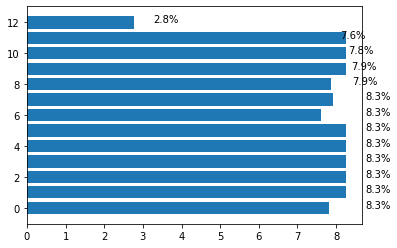

In [22]:
plot_category(df,'Activity')
plt.show()

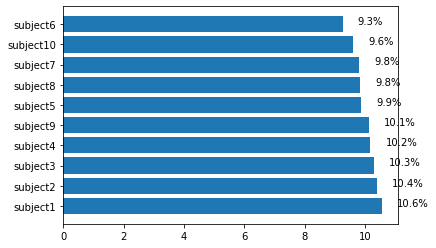

In [23]:
plot_category(df,'subject')

In [24]:
subject1 = df[df['subject']=='subject1']


In [25]:
vc = df["subject"].value_counts()
vc

subject1     39351
subject2     38679
subject3     38333
subject4     37924
subject9     37727
subject5     36801
subject8     36618
subject7     36541
subject10    35818
subject6     34488
Name: subject, dtype: int64

In [26]:
px.bar(vc, x=vc.index, y=vc.values, color=vc.index)

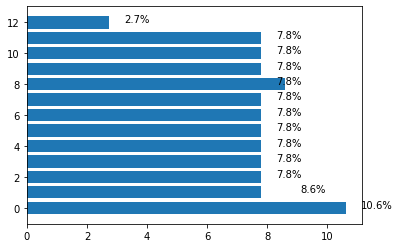

In [27]:
plot_category(subject1,'Activity')

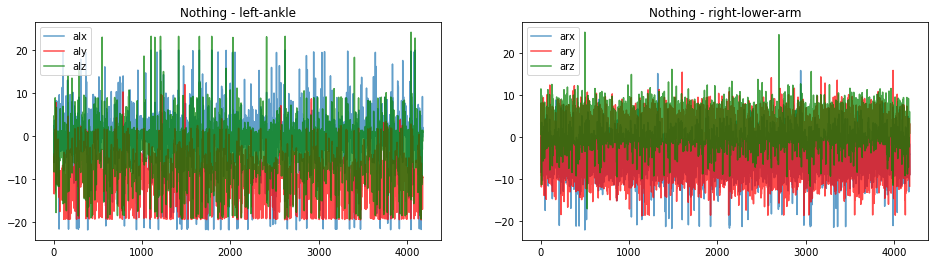

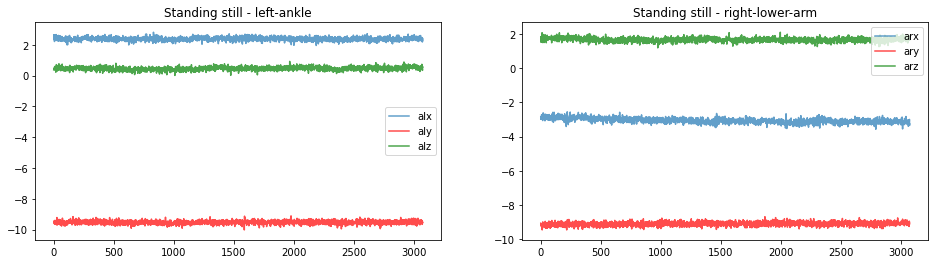

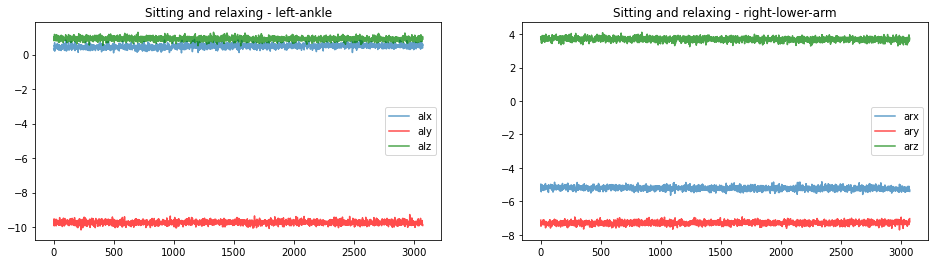

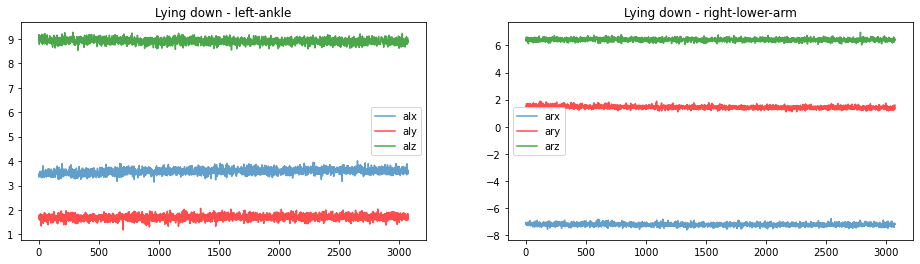

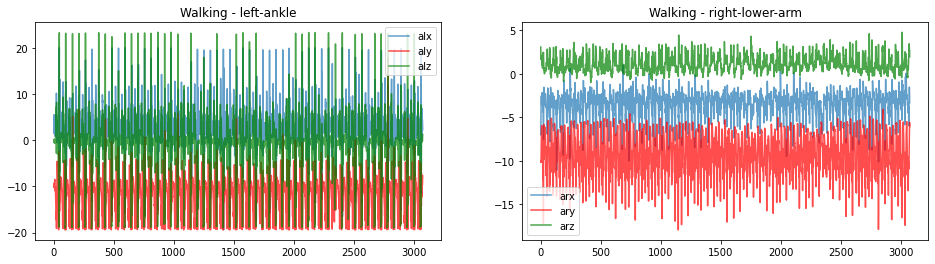

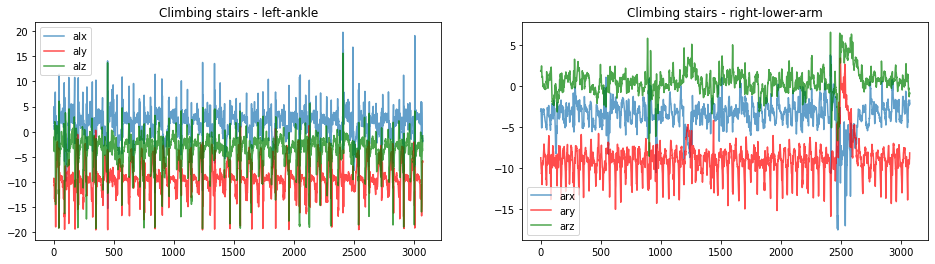

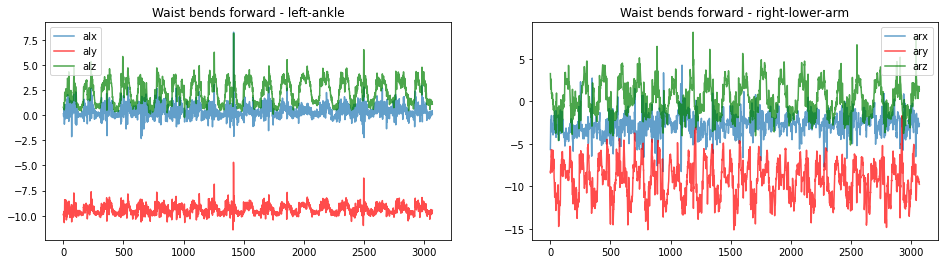

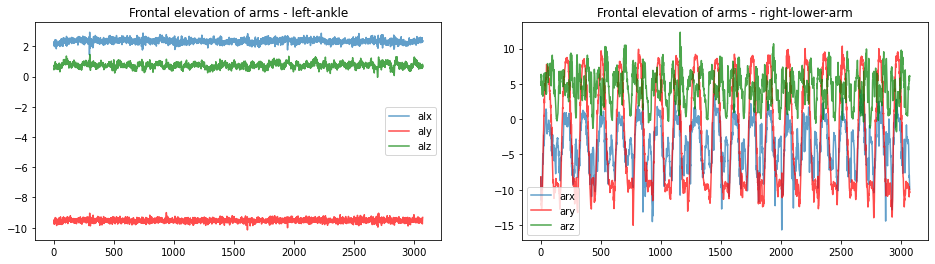

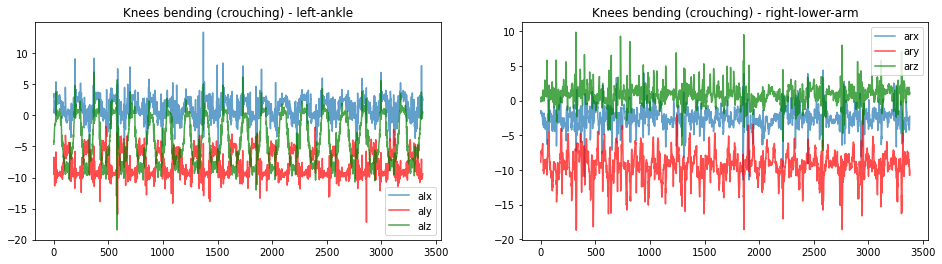

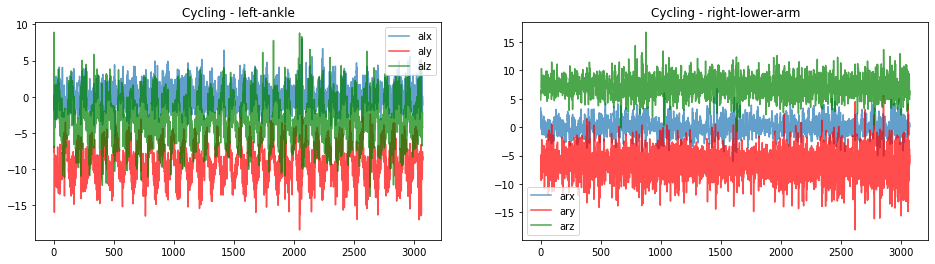

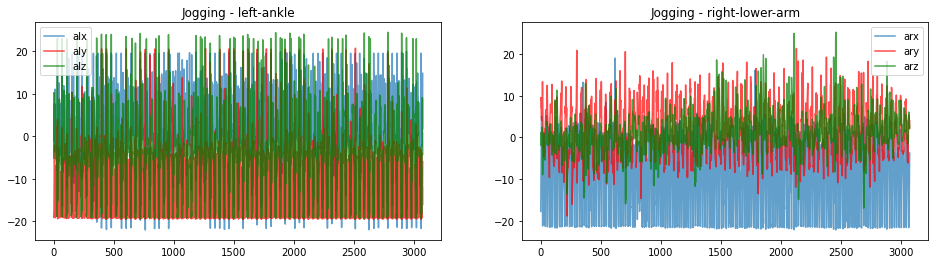

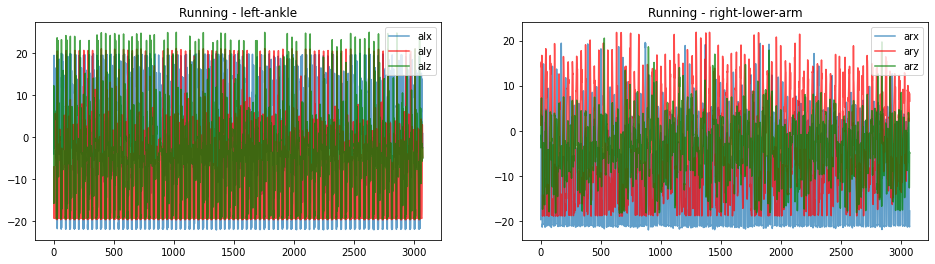

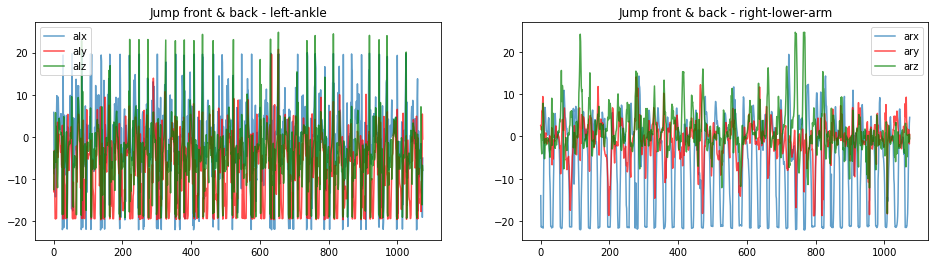

In [28]:
plot_comparison(subject1,'acceleration')

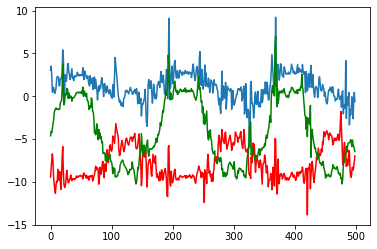

In [29]:
plt.plot(subject1[subject1.Activity == 8].reset_index(drop=True).head(500)['alx'])
plt.plot(subject1[subject1.Activity == 8].reset_index(drop=True).head(500)['aly'], color='red')
plt.plot(subject1[subject1.Activity == 8].reset_index(drop=True).head(500)['alz'], color='green');

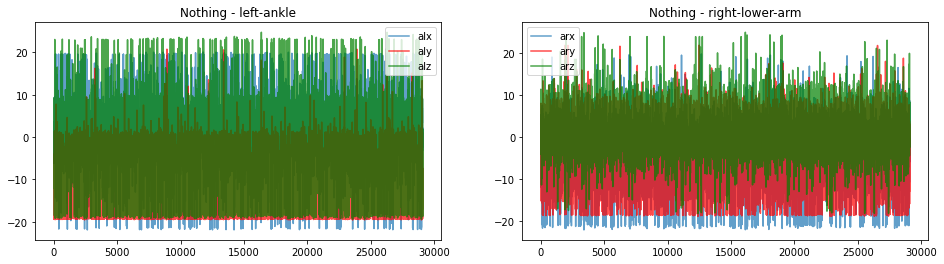

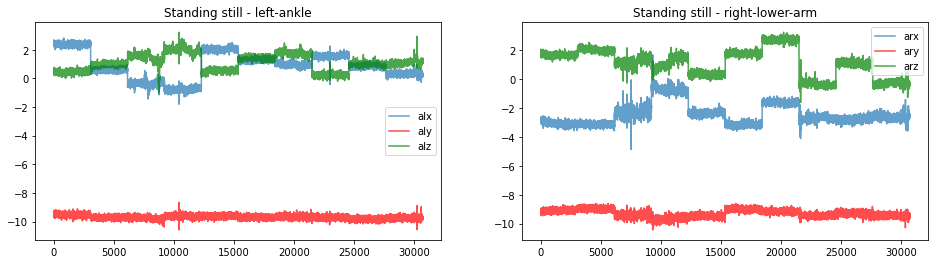

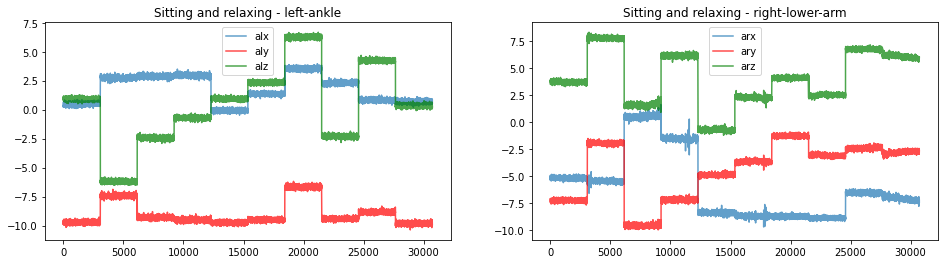

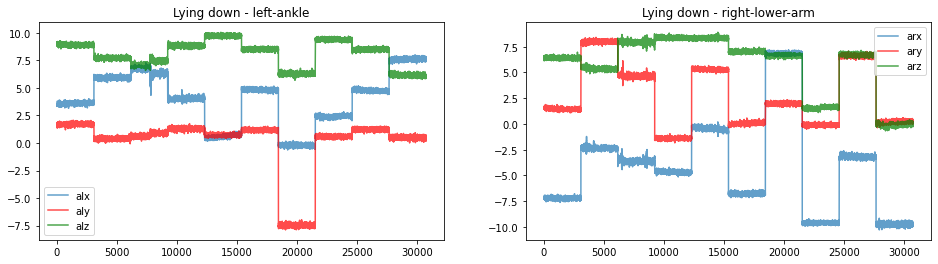

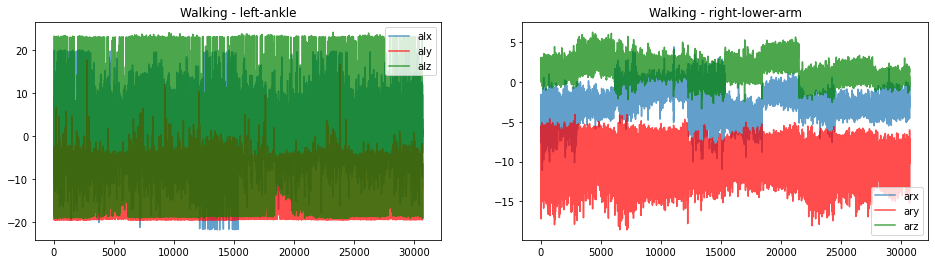

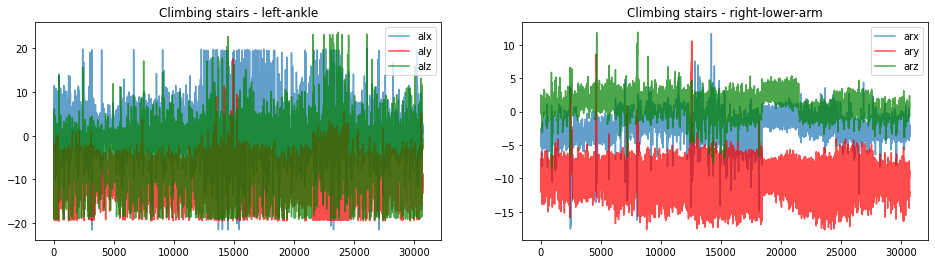

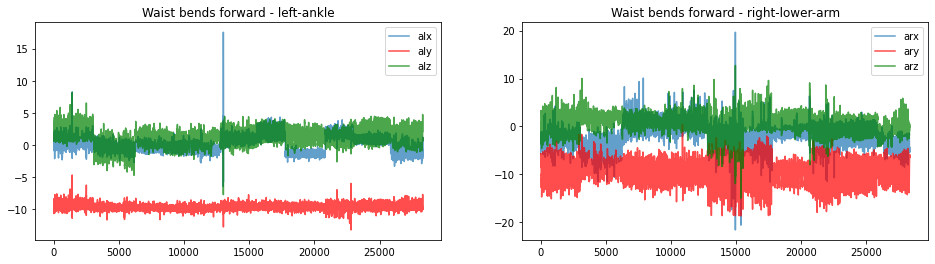

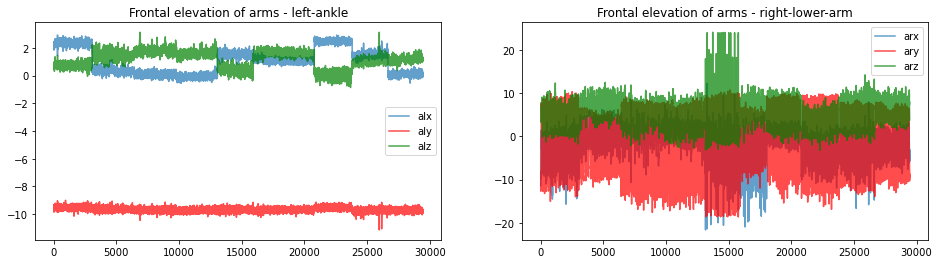

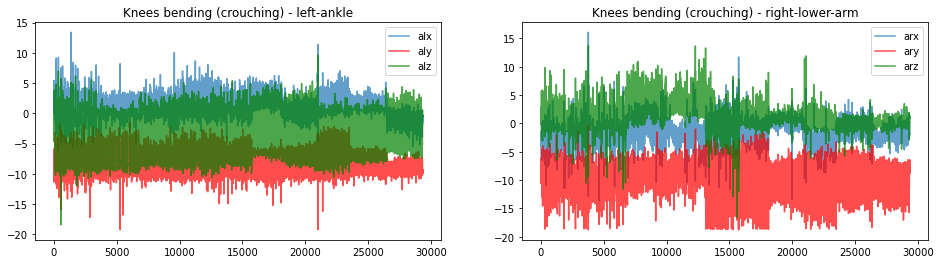

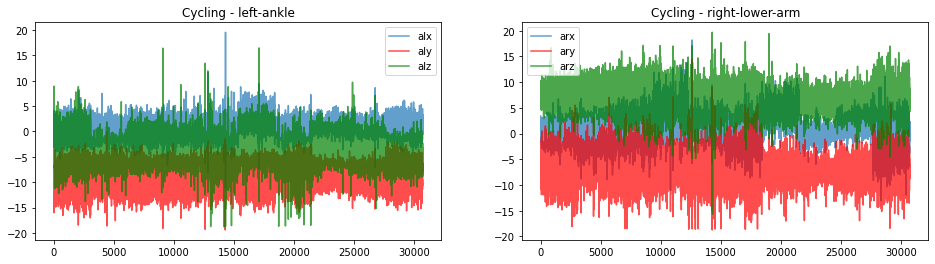

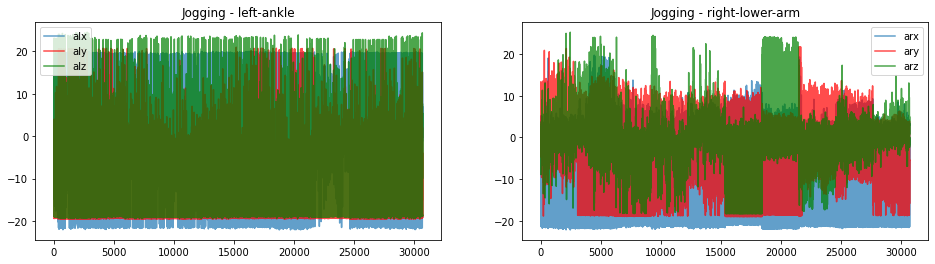

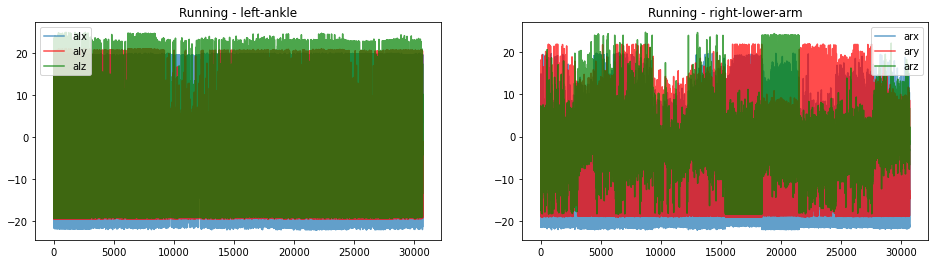

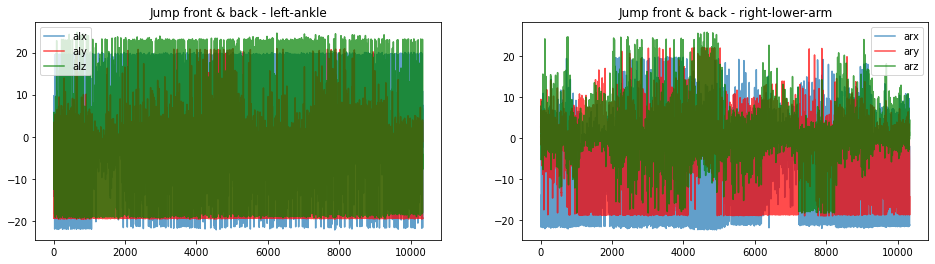

In [30]:
plot_comparison(df)

<Figure size 576x432 with 0 Axes>

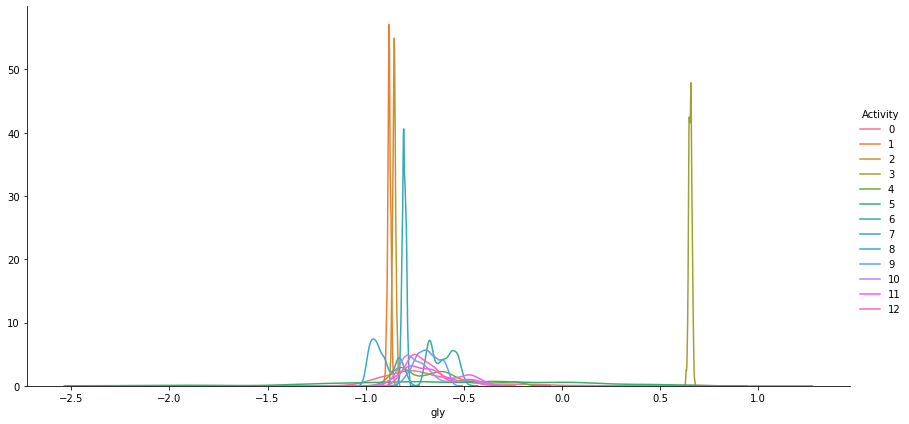

In [31]:
plt.figure(figsize=(8,6))
facetgrid = sns.FacetGrid(subject1, hue='Activity', height=6, aspect=2)
facetgrid.map(sns.distplot,'gly', hist=False).add_legend()
plt.show();

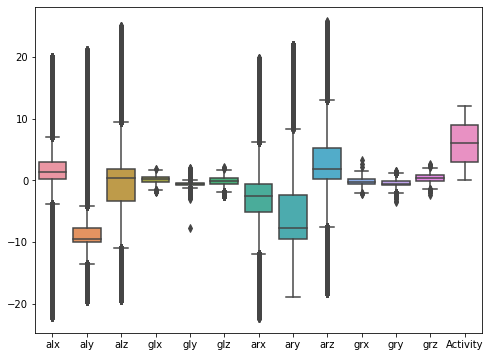

In [32]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df)
plt.show()

In [33]:
df.describe().T

count      mean       std      min        25%       50%  \
alx       372280.0  1.771027  4.172418 -22.1460   0.159087  1.365650   
aly       372280.0 -9.127639  5.101975 -19.6190 -10.078000 -9.606300   
alz       372280.0 -0.726089  6.355493 -19.3730  -3.368625  0.299375   
glx       372280.0  0.090394  0.463281  -1.8942  -0.354360  0.183670   
gly       372280.0 -0.557061  0.427508  -7.7899  -0.810510 -0.690430   
glz       372280.0 -0.125207  0.555029  -2.6267  -0.571710 -0.110020   
arx       372280.0 -3.477788  5.780065 -22.3450  -5.162625 -2.532800   
ary       372280.0 -5.784344  6.493884 -18.9720  -9.542800 -7.712850   
arz       372280.0  2.383474  4.147604 -18.2390   0.138650  1.830900   
grx       372280.0 -0.209329  0.547731  -2.2392  -0.686270 -0.307840   
gry       372280.0 -0.416437  0.547800  -3.5113  -0.837780 -0.599590   
grz       372280.0  0.368620  0.522133  -2.3362  -0.056034  0.435340   
Activity  372280.0  5.687055  3.574002   0.0000   3.000000  6.000000   

               75%      max  
alx       2.883700  20.0440  
aly      -7.722375  21.1610  
alz       1.760300  25.0150  
glx       0.484230   1.7941  
gly      -0.493430   2.0038  
glz       0.349710   2.1022  
arx      -0.601955  19.8010  
ary      -2.373800  21.9650  
arz       5.287000  25.7410  
grx       0.252940   3.2588  
gry      -0.053388   1.5565  
grz       0.834050   2.6207  
Activity  9.000000  12.0000

In [34]:
def preprocess_inputs(df):
    df = df.copy()
    df = df.drop('subject', axis=1)
    
    samples = []
    for category in df['Activity'].unique():
        category_slice = df.query("Activity == @category")
        samples.append(category_slice.sample(2000, random_state=1))
    df = pd.concat(samples, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)
    
    y = df['Activity']
    X = df.drop('Activity', axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [35]:
X_train, X_test, y_train, y_test = preprocess_inputs(df)

In [36]:
X_train

alx       aly       alz       glx       gly       glz       arx  \
11053  0.188019  0.006462 -0.227579 -1.505898 -0.703738  0.614441  0.433045   
12600  0.012763 -0.068942 -0.629326  0.902507  1.395344 -0.904193  0.003734   
7364  -0.741512 -0.330751 -0.072983 -0.122258 -0.650154  0.948743  1.096023   
4806  -0.309668 -0.370427  0.017870  1.034105 -0.440246  0.578869 -0.095336   
19271 -0.037446 -0.133903 -0.039918  1.273336 -0.310725  0.244559  0.106195   
...         ...       ...       ...       ...       ...       ...       ...   
10955 -0.188447 -0.149998  0.305672 -1.398243 -0.493830  0.859841  0.129502   
17289 -0.596901 -0.070664  0.427128 -1.629500 -0.413442 -0.260462  0.570330   
5192   0.156334  1.824441  1.580136  0.770932  3.610545  0.354810 -1.004363   
12172 -0.042200  0.086545 -0.642284  1.097894 -0.458099 -0.082639  1.005512   
235    0.434666  0.430308  1.078004  1.177652 -0.364309  0.201881 -0.876407   

            ary       arz       grx       gry       grz  
11053 -0.328323 -0.338820 -1.321804 -0.164647 -1.171589  
12600 -1.373747  0.030758  1.371505 -0.640965  0.102497  
7364  -0.167813  0.934700  1.605071  0.150408  1.140491  
4806  -0.487691 -0.255131 -0.810878 -0.438423  0.513637  
19271  0.075244 -0.344438 -0.051795 -0.678464  0.835195  
...         ...       ...       ...       ...       ...  
10955 -0.550744 -0.348696 -1.077294 -0.554699 -1.016901  
17289 -0.605800 -0.148540  0.075941 -0.986012 -1.627492  
5192   0.848750 -0.136623 -0.434984  2.284469  0.619463  
12172  0.124635  1.176610  2.006519  0.337936  0.822994  
235    0.668243  0.450336 -0.478779 -0.370915  0.464776  

[18200 rows x 12 columns]

In [37]:
lr = LogisticRegression()

In [38]:
lr.fit(X_train, y_train)

LogisticRegression()

In [39]:
acc = lr.score(X_test, y_test)

In [40]:
print("Test Accuracy: {:.2f}%".format(acc * 100))

Test Accuracy: 55.38%


In [41]:
y_pred = lr.predict(X_test)

In [42]:
cm = confusion_matrix(y_test, y_pred, labels=list(range(13)))

In [43]:
clr = classification_report(y_test, y_pred, labels=list(range(13)), target_names=label_map.values())

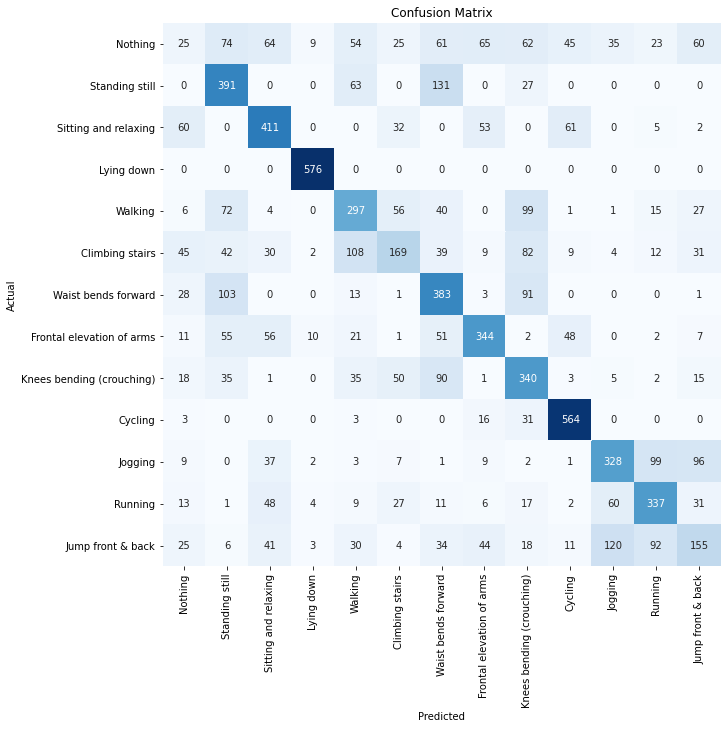

In [44]:
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(13) + 0.5, labels=label_map.values(), rotation=90)
plt.yticks(ticks=np.arange(13) + 0.5, labels=label_map.values(), rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [45]:
new_df = df.copy()

In [46]:
for feature in new_df.columns[:-2]:
    lower_range = np.quantile(df[feature],0.01)
    upper_range = np.quantile(df[feature],0.99)
    print(feature,'range:',lower_range,'to',upper_range)
    new_df = new_df.drop(new_df[(new_df[feature]>upper_range) | (new_df[feature]<lower_range)].index, axis=0)
    print('shape',new_df.shape)

alx range: -11.481209999999999 to 19.234
shape (364839, 14)
aly range: -19.379 to 2.452431000000023
shape (359129, 14)
alz range: -18.95 to 14.181420000000042
shape (355387, 14)
glx range: -0.74212 to 0.80705
shape (348542, 14)
gly range: -1.0675 to 0.9662300000000001
shape (341987, 14)
glz range: -1.1061 to 0.82908
shape (336551, 14)
arx range: -21.492 to 9.104067000000057
shape (331475, 14)
ary range: -18.694000000000003 to 11.956630000000063
shape (325419, 14)
arz range: -10.38084 to 11.822
shape (322860, 14)
grx range: -1.0196 to 0.95686
shape (319392, 14)
gry range: -1.1417 to 0.9076
shape (314567, 14)
grz range: -0.69828 to 1.125
shape (310179, 14)


In [47]:
train = new_df[(new_df['subject'] != 'subject10') & (new_df['subject'] != 'subject9')]

In [48]:
test = new_df.drop(train.index, axis=0)

In [49]:
train.shape,test.shape

((245921, 14), (64258, 14))

In [50]:
X_train = train.drop(['Activity','subject'],axis=1)

In [51]:
y_train = train['Activity']

In [52]:
X_test = test.drop(['Activity','subject'],axis=1)

In [53]:
y_test = test['Activity']

In [54]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((245921, 12), (245921,), (64258, 12), (64258,))

In [55]:
def create_dataset(X, y, time_steps, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        x = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(x)
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

In [56]:
X_train,y_train = create_dataset(X_train, y_train, 100, step=50)

In [57]:
X_train.shape, y_train.shape

((4917, 100, 12), (4917, 1))

In [58]:
X_test,y_test = create_dataset(X_test, y_test, 100, step=50)

In [59]:
X_test.shape, y_test.shape

((1284, 100, 12), (1284, 1))

In [60]:
def create_model():
    model = Sequential()
    model.add(Input(shape=[100,12]))
    model.add(Conv1D(filters=32, kernel_size=3, padding="same"))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv1D(filters=64, kernel_size=3, padding="same"))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(MaxPool1D(2))
    model.add(LSTM(64))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(13, activation='softmax'))
    return model

In [61]:
model = create_model()

In [62]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 100, 32)           1184      
_________________________________________________________________
batch_normalization (BatchNo (None, 100, 32)           128       
_________________________________________________________________
re_lu (ReLU)                 (None, 100, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 100, 64)           6208      
_________________________________________________________________
batch_normalization_1 (Batch (None, 100, 64)           256       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 100, 64)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 50, 64)            0

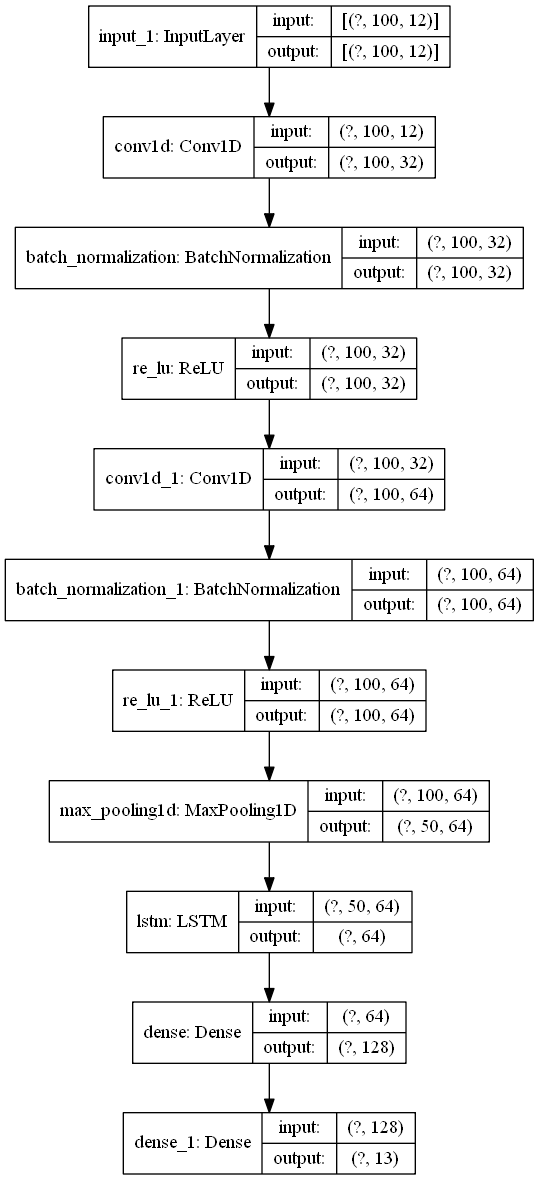

In [63]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [64]:
callbacks = [ModelCheckpoint("rehab_best.h5", save_best_only=True, monitor="val_loss"),
             EarlyStopping(monitor="val_loss", patience=50, verbose=1)]

In [65]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"],)

In [66]:
model_history = model.fit(X_train,y_train, epochs= 10, validation_data=(X_test,y_test), callbacks=callbacks)

Epoch 1/10
154/154 [==============================] - 8s 50ms/step - loss: 0.7966 - sparse_categorical_accuracy: 0.7442 - val_loss: 2.8632 - val_sparse_categorical_accuracy: 0.3232
Epoch 2/10
154/154 [==============================] - 7s 46ms/step - loss: 0.2223 - sparse_categorical_accuracy: 0.9237 - val_loss: 0.3730 - val_sparse_categorical_accuracy: 0.8738
Epoch 3/10
154/154 [==============================] - 7s 44ms/step - loss: 0.1338 - sparse_categorical_accuracy: 0.9601 - val_loss: 0.3563 - val_sparse_categorical_accuracy: 0.9120
Epoch 4/10
154/154 [==============================] - 7s 45ms/step - loss: 0.0913 - sparse_categorical_accuracy: 0.9721 - val_loss: 0.3795 - val_sparse_categorical_accuracy: 0.9089
Epoch 5/10
154/154 [==============================] - 7s 46ms/step - loss: 0.0601 - sparse_categorical_accuracy: 0.9835 - val_loss: 0.2935 - val_sparse_categorical_accuracy: 0.9213
Epoch 6/10
154/154 [==============================] - 7s 44ms/step - loss: 0.0485 - sparse_cate

In [67]:
train_loss = model_history.history['loss']

In [68]:
val_loss = model_history.history['val_loss']

In [69]:
train_accuracy = model_history.history['sparse_categorical_accuracy']

In [70]:
val_accuracy = model_history.history['val_sparse_categorical_accuracy']

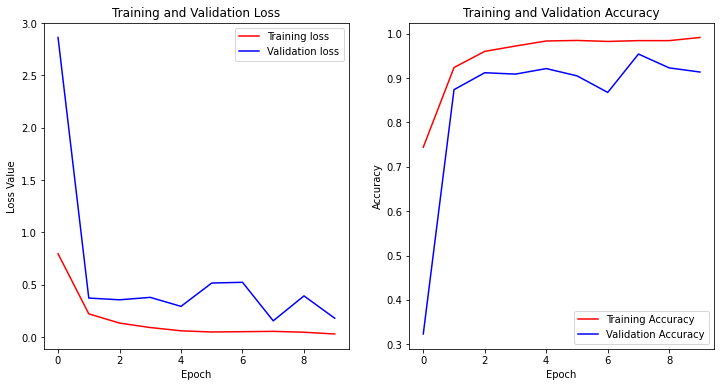

In [71]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(train_loss, 'r', label='Training loss')
plt.plot(val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_accuracy, 'r', label='Training Accuracy')
plt.plot(val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [72]:
model = load_model('./rehab_best.h5')

In [73]:
train_loss, train_acc = model.evaluate(X_train,y_train)
test_loss, test_acc = model.evaluate(X_test,y_test)

41/41 [==============================] - 0s 11ms/step - loss: 0.1554 - sparse_categorical_accuracy: 0.9540


In [74]:
print("Train accuracy", round(train_acc*100, 2),'%')
print("Train loss", train_loss)
print("Test accuracy", round(test_acc*100, 2),'%')
print("Test loss", test_loss)

Train accuracy 98.72 %
Train loss 0.038539763540029526
Test accuracy 95.4 %
Test loss 0.155420184135437


In [75]:
pred = model.predict(X_test)
pred = np.argmax(pred, axis = 1)
pred = pred.reshape(-1,1)

In [76]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        89
           1       0.98      1.00      0.99       122
           2       0.99      0.99      0.99       123
           3       1.00      0.99      1.00       123
           4       1.00      0.99      1.00       120
           5       0.69      0.87      0.77        85
           6       0.94      0.98      0.96       105
           7       0.98      0.99      0.99       112
           8       0.89      0.66      0.75       117
           9       0.99      1.00      1.00       120
          10       0.99      1.00      0.99        89
          11       1.00      0.98      0.99        53
          12       0.96      1.00      0.98        26

    accuracy                           0.95      1284
   macro avg       0.95      0.96      0.95      1284
weighted avg       0.96      0.95      0.95      1284



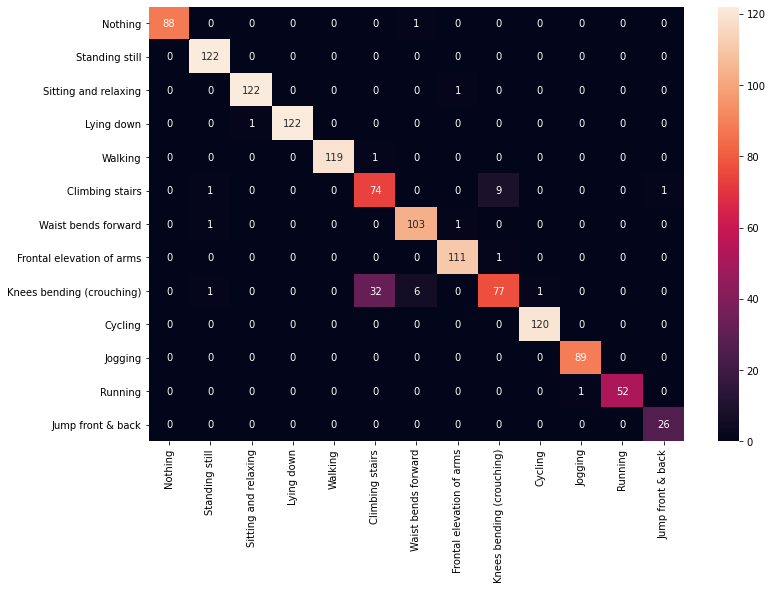

In [77]:
plt.figure(figsize=(12,8))
conf_matrix = confusion_matrix(y_test,pred)
sns.heatmap(conf_matrix, xticklabels= label_map.values(), yticklabels= label_map.values(), annot=True, fmt="d")
plt.show()